In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
import umap
df = pd.read_csv("hitters.csv")
df.head()

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\oskar\AppData\Local\Programs\Python\Python3

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
num_cols = [col for col in df.columns if np.issubdtype(df[col],np.number) and col != 'Salary']
df1=df[num_cols]
df1.dropna(inplace=True)
df1

C:\Users\oskar\AppData\Local\Temp\ipykernel_9276\4219625003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [3]:
sc = StandardScaler().set_output(transform="pandas")
df1 = sc.fit_transform(df1)

yüzde 90 ı 5 değişken ile ifade edilir 


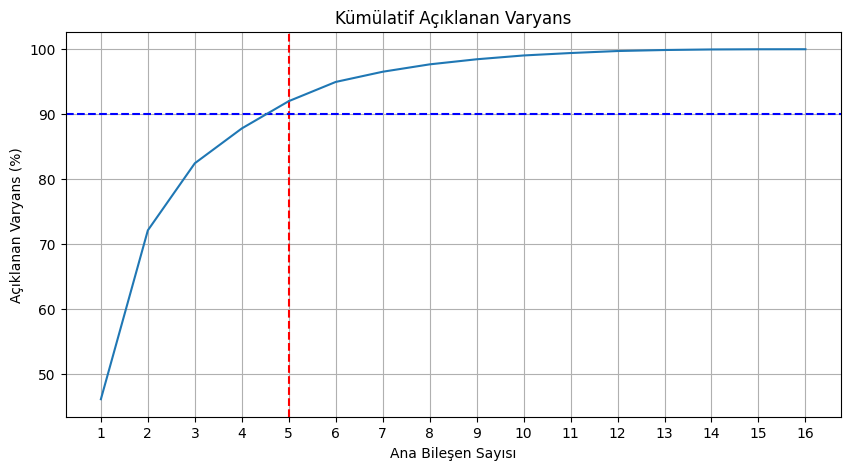

In [4]:
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
pca = PCA(random_state=7)
pca.fit(df1)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>90)
print(f"yüzde 90 ı {k+1} değişken ile ifade edilir ")
plt.figure(figsize=(10,5))

# Grafikteki x eksenini 1 bazlı yapmak için +1 ekleyelim
plt.axvline(x=k+1, color='red',linestyle='--')
plt.axhline(y=90, color='blue',linestyle='--')

plt.grid()
plt.plot(range(1, len(var_cumu)+1), var_cumu)
plt.xlabel('Ana Bileşen Sayısı')
plt.ylabel('Açıklanan Varyans (%)')
plt.title('Kümülatif Açıklanan Varyans')
plt.xticks(ticks=range(1, len(var_cumu)+1))  # x eksenini 1 bazlı yapmak için

plt.show()

In [5]:
pca = PCA()
pca.fit(df1)
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [6]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "16" 


In [7]:
# UMAP uygulama
reducer_umap = umap.UMAP(random_state=10)
X_umap = reducer_umap.fit_transform(df1)

# Isomap uygulama
reducer_isomap = Isomap(n_components=2)
X_isomap = reducer_isomap.fit_transform(df1)

# LLE uygulama
reducer_lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = reducer_lle.fit_transform(df1)


c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


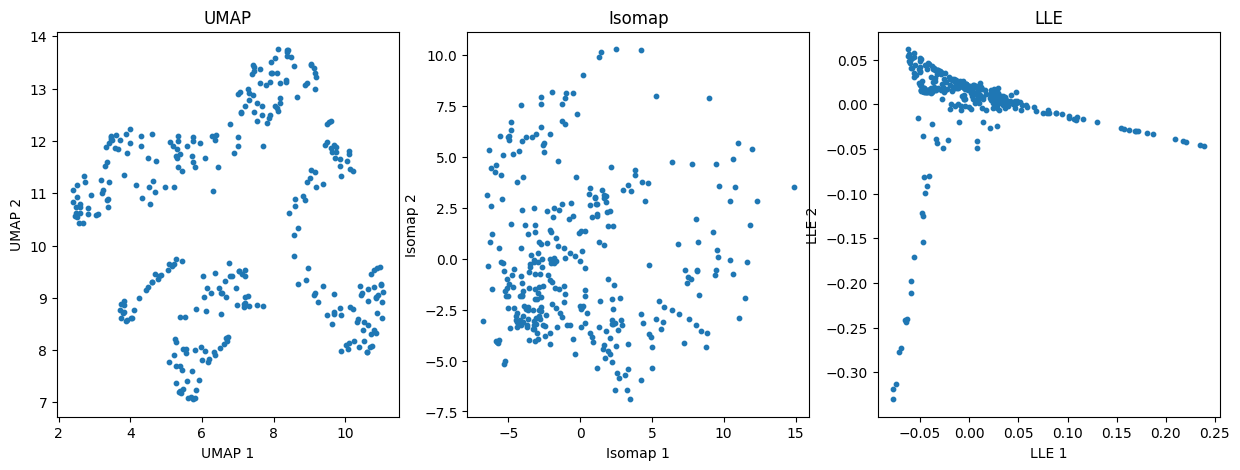

In [8]:
plt.figure(figsize=(15, 5))

# UMAP sonuçları
plt.subplot(1, 3, 1)
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')

# Isomap sonuçları
plt.subplot(1, 3, 2)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], s=10)
plt.xlabel('Isomap 1')
plt.ylabel('Isomap 2')
plt.title('Isomap')

# LLE sonuçları
plt.subplot(1, 3, 3)
plt.scatter(X_lle[:, 0], X_lle[:, 1], s=10)
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.title('LLE')

plt.show()


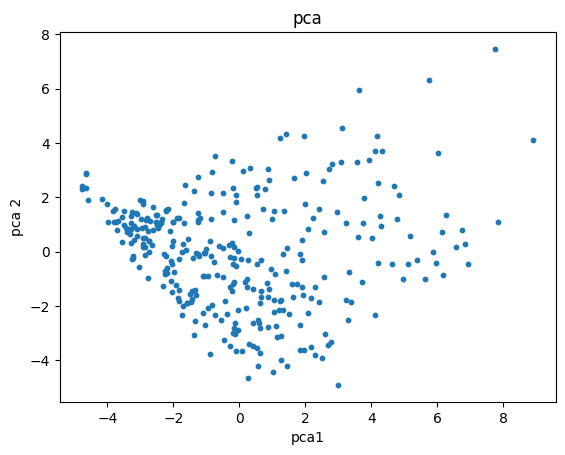

In [9]:
pca = PCA(random_state=7,n_components=2)
pca_df=pca.fit_transform(df1)
plt.scatter(pca_df[:, 0], pca_df[:, 1], s=10)
plt.xlabel('pca1')
plt.ylabel('pca 2')
plt.title('pca')

plt.show()


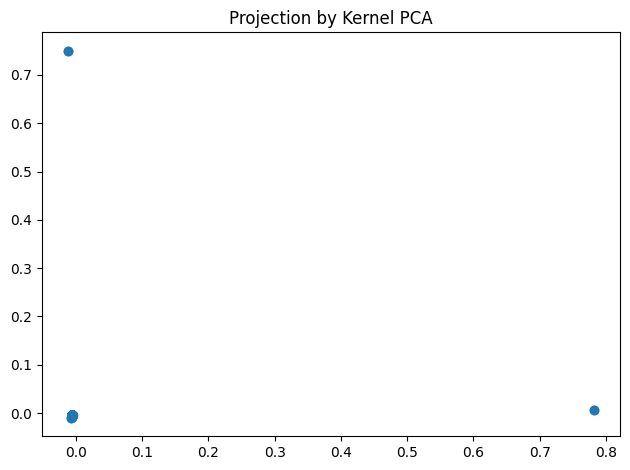

In [10]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10,n_components =2)
X_kpca = kpca.fit_transform(df1)
plt.title("Projection by Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1])

plt.tight_layout()
plt.show()

Optimal number of components: 4


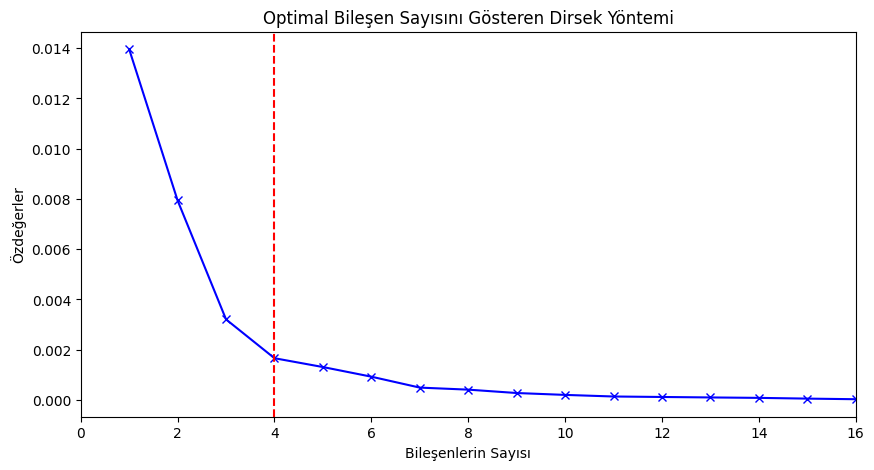

In [90]:
from kneed import KneeLocator
n_features = df1.shape[1]  # df1'in özellik sayısı
kpca = KernelPCA(kernel="rbf", gamma=0.001, fit_inverse_transform=True, n_components=n_features)
X_kpca = kpca.fit_transform(df1)

# Alfa değerlerini alma ve bunları eigen değerlerine dönüştürme
eigenvalues = np.var(X_kpca, axis=0)

# Dirsek noktasını belirleme
kl = KneeLocator(range(1, len(eigenvalues) + 1), eigenvalues, curve="convex", direction="decreasing")
print(f"Optimal number of components: {kl.elbow}")

# Sonuçları görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_features + 1), eigenvalues[:n_features], 'bx-')  # İlk n_features kadar özdeğer kullanılarak
plt.xlabel('Bileşenlerin Sayısı')
plt.ylabel('Özdeğerler')
plt.title('Optimal Bileşen Sayısını Gösteren Dirsek Yöntemi')
plt.axvline(x=kl.elbow, color='red', linestyle='--')

plt.xlim([0, n_features])  # Sadece df1'in özellik sayısına kadar olan bileşenleri göster

plt.show()

In [12]:
others= [col for col in df.columns if col not in num_cols]
others

['League', 'Division', 'Salary', 'NewLeague']

In [13]:
pca = PCA(n_components=6).set_output(transform="pandas")
pca_df = pca.fit_transform(df1)
pca_df

,pca0,pca1,pca2,pca3,pca4,pca5
0,-3.240106,-0.253173,0.776066,1.219268,0.727847,-0.049711
1,0.245488,1.302951,0.118040,1.591864,-0.102789,-0.072754
2,0.603883,-2.617002,-0.698183,1.752523,-0.267457,-1.094465
3,3.591276,0.547821,-1.049022,-0.756069,0.780899,0.791621
4,-2.264528,-0.698898,-1.290536,1.718851,-0.145780,0.196242
...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,-0.218548,-0.863704,1.056143
318,3.339811,-0.732713,3.114194,0.207578,-1.935437,-1.441481
319,-0.951442,-0.910086,0.286517,-1.032621,-1.223205,0.212958
320,2.091473,-2.265826,-0.192745,3.128594,-1.461111,-0.174220


In [14]:
final_df = pd.concat([pca_df,df[others]],axis=1)
final_df

,pca0,pca1,pca2,pca3,pca4,pca5,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,1.219268,0.727847,-0.049711,A,E,NaN,A
1,0.245488,1.302951,0.118040,1.591864,-0.102789,-0.072754,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,1.752523,-0.267457,-1.094465,A,W,480.0,A
3,3.591276,0.547821,-1.049022,-0.756069,0.780899,0.791621,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,1.718851,-0.145780,0.196242,N,E,91.5,N
...,...,...,...,...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,-0.218548,-0.863704,1.056143,N,E,700.0,N
318,3.339811,-0.732713,3.114194,0.207578,-1.935437,-1.441481,A,E,875.0,A
319,-0.951442,-0.910086,0.286517,-1.032621,-1.223205,0.212958,A,W,385.0,A
320,2.091473,-2.265826,-0.192745,3.128594,-1.461111,-0.174220,A,E,960.0,A


In [118]:
kpca = KernelPCA(kernel="rbf", gamma=0.001, n_components=6).set_output(transform="pandas")
kernel_pca_df = kpca.fit_transform(df1)
final_df_kernel = pd.concat([kernel_pca_df,df[others]],axis=1)
final_df_kernel

,kernelpca0,kernelpca1,kernelpca2,kernelpca3,kernelpca4,kernelpca5,League,Division,Salary,NewLeague
0,-0.140589,-0.012334,0.034045,0.054876,0.032195,0.003163,A,E,NaN,A
1,0.009517,0.057172,0.005286,0.068712,-0.008883,-0.002168,N,W,475.0,N
2,0.028670,-0.115353,-0.031868,0.077758,-0.012824,0.045848,A,W,480.0,A
3,0.158229,0.026736,-0.046206,-0.033928,0.033633,-0.035387,N,E,500.0,N
4,-0.098754,-0.031331,-0.057039,0.075108,-0.007933,-0.008475,N,E,91.5,N
...,...,...,...,...,...,...,...,...,...,...
317,-0.004115,-0.023737,-0.034618,-0.012576,-0.040289,-0.045708,N,E,700.0,N
318,0.146644,-0.030632,0.135123,0.008465,-0.083796,0.064819,A,E,875.0,A
319,-0.041614,-0.041389,0.012573,-0.047585,-0.053770,-0.007106,A,W,385.0,A
320,0.093526,-0.098409,-0.010032,0.136637,-0.067971,0.006626,A,E,960.0,A


In [119]:
others

['League', 'Division', 'Salary', 'NewLeague']

In [120]:
def label_encoder(df,col):
    le =LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df

for col in ['League', 'Division', 'NewLeague']:
    label_encoder(final_df_kernel,col)
    

for col in ['League', 'Division', 'NewLeague']:
    label_encoder(final_df,col) 

In [121]:
final_df.dropna(inplace=True)
final_df_kernel.dropna(inplace=True)
final_df_kernel

,kernelpca0,kernelpca1,kernelpca2,kernelpca3,kernelpca4,kernelpca5,League,Division,Salary,NewLeague
1,0.009517,0.057172,0.005286,0.068712,-0.008883,-0.002168,1,1,475.0,1
2,0.028670,-0.115353,-0.031868,0.077758,-0.012824,0.045848,0,1,480.0,0
3,0.158229,0.026736,-0.046206,-0.033928,0.033633,-0.035387,1,0,500.0,1
4,-0.098754,-0.031331,-0.057039,0.075108,-0.007933,-0.008475,1,0,91.5,1
5,0.055694,-0.080656,0.160549,0.005837,-0.000499,-0.049394,0,1,750.0,0
...,...,...,...,...,...,...,...,...,...,...
317,-0.004115,-0.023737,-0.034618,-0.012576,-0.040289,-0.045708,1,0,700.0,1
318,0.146644,-0.030632,0.135123,0.008465,-0.083796,0.064819,0,0,875.0,0
319,-0.041614,-0.041389,0.012573,-0.047585,-0.053770,-0.007106,0,1,385.0,0
320,0.093526,-0.098409,-0.010032,0.136637,-0.067971,0.006626,0,0,960.0,0


In [122]:
X1 = final_df.drop("Salary",axis=1)
y1 = final_df["Salary"]

X2 = final_df_kernel.drop("Salary",axis=1)
y2 = final_df_kernel["Salary"]

In [123]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
ridge = Ridge()
rf= RandomForestRegressor(max_depth=5)
-cross_val_score(ridge,X1,y1, cv=10,scoring="neg_root_mean_squared_error" ).mean()

334.65566056218483

In [124]:
-cross_val_score(ridge,X2,y2, cv=10,scoring="neg_root_mean_squared_error" ).mean()

338.0453240568488

In [130]:
-cross_val_score(rf,X1,y1, cv=10,scoring="neg_root_mean_squared_error" ).mean()

283.8303197805504

In [129]:
-cross_val_score(rf,X2,y2, cv=10,scoring="neg_root_mean_squared_error" ).mean()

282.15968469616286